In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib as mpl

In [4]:
import matplotlib.pyplot as plt

In [5]:
from matplotlib.animation import FuncAnimation

In [6]:
from sklearn.datasets import load_boston

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
from IPython.display import HTML

The steos involves in a solving a problem with amchine learning techniques

1. Data preprocessing
2. Define "Error"
3. Split the data into two types : Training and testing data
4. Train the model: This step involves "learining" the target function from the given data. Choose the appropriate machine learning algorithm. Train it on the data. Test the model with the testing data

5. Prediction: Obtain the predicted values for the given input and validate results


# Step1: Data Preprocessing
     
     Load the dataset

In [11]:
boston= load_boston()
# Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
features = pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [13]:
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [14]:
target = pd.DataFrame(boston.target,columns=["target"])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [15]:
max(target['target'])

50.0

In [16]:
min(target['target'])

5.0

In [17]:
target.min()

target    5.0
dtype: float64

In [18]:
df = pd.concat([features,target],axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# calculate correlation between every column on the data

### method: pearson, kendall,spearman or callable 
        1.pearson: standard correlation coefficient
        2.kendall: kendall Tau correlation coefficient
        3.spearman: spearman rank correlation
        4.callable: callable with input two 1d arrays

In [25]:
corr = df.corr('pearson')
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


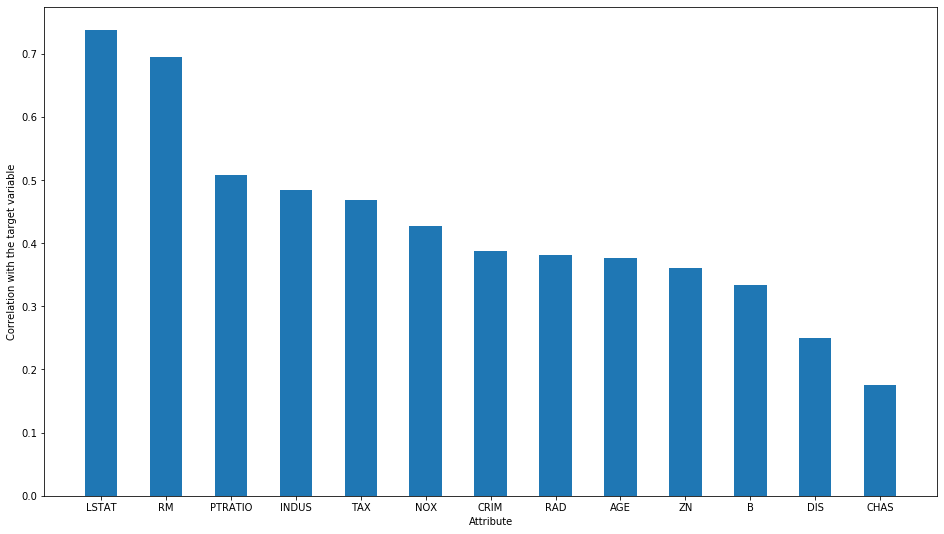

In [29]:
# Take absolute values of correlation
corrs = [abs(corr[attr]['target']) for attr in list(features)]
# Make a list of pairs [[cors,features]]
l= list(zip(corrs, list(features)))
# sort the list of pairs in revrese/descending order
# with the correlation valur as the key for sorting
l.sort(key=lambda x: x[0],reverse=True)
# 'unzip pairs to two lists'
# zip(*l) takes a list that looks like[[a,b,c] , [d,e,f],[g,h,i]]
# and returns [[a,d,g],[b,e,h],[c,f,i]]
corrs,labels = list(zip(*l))
# plot correlations with respect to the target variable as a bar graph
index= np.arange(len(labels))
plt.figure(figsize=(16,9))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attribute')
plt.ylabel('Correlation with the target variable')
plt.xticks(index,labels)
plt.show()

In [30]:
import seaborn as sns

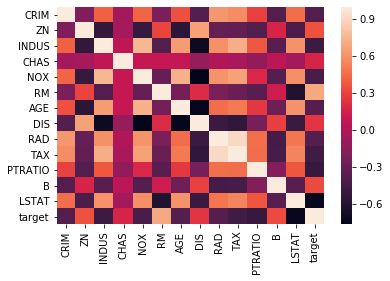

In [32]:
sns.heatmap(df.corr())

## Normalize the data

In [42]:
x = df['LSTAT'].values
y= df ['target'].values

In [44]:
# Before normalization
print(y[:5])

[24.  21.6 34.7 33.4 36.2]


In [45]:
x_scaler = MinMaxScaler() # minmax scalar provides a method called inverse_transform() to obtain the values in original representation so that we can predict the true values and predicted values 
x= x_scaler.fit_transform(x.reshape(-1,1))
# fit transform function gives min and maax values it transforms the values the normalized values
# It can also be done in two steps by calling fit() function first computes min and max
# Then calling transform() function which transforms the values into normalized values
# The fit transform method expects the values column wise that is instead of horizontal it has to be vertical so we used reshape function of numpy
x= x[:,-1]
y_scalar = MinMaxScaler()
y= y_scalar.fit_transform(y.reshape(-1,1))
y = y[:,-1]

In [47]:
print(y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]
